In [41]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd
import reframed

In [40]:
uptake = -18 #mmol/gDW/h
malate_yield = 0.04 #gDW/mmol
mu_malate = 0.4

In [19]:
x0 = 0.01 #gDW/L
def dx_dt_fun(t, x):
    return [x[0]*mu_malate, x[0]*uptake]

In [33]:
conc_df = pd.read_csv('absolute_concentrations_sintef_snorre.csv')

In [37]:
idx = (conc_df['Metabolite']=='MALATE')&(conc_df['Carbon source']=='L-malate')
conc_df.loc[idx]

,Unnamed: 0,Sample_ID,Carbon source,Metabolite,Concentration [uM],Hours,Timepoint,Bioreactor
1182,1182,SM_MPTA_112023_31_L-malate-T6_M5_13,L-malate,MALATE,25626.353707,6.00,1,M5
1183,1183,SM_MPTA_112023_32_L-malate-T6_M6_14,L-malate,MALATE,19546.288734,6.00,1,M6
1184,1184,SM_MPTA_112023_33_L-malate-T6_M7_15,L-malate,MALATE,23585.690231,6.00,1,M7
1185,1185,SM_MPTA_112023_127_L-malate-T9_M5_16,L-malate,MALATE,9813.990711,9.25,2,M5
1186,1186,SM_MPTA_112023_50_L-malate-T10_M6_17,L-malate,MALATE,10379.076775,10.00,2,M6
1187,1187,SM_MPTA_112023_129_L-malate-T9_M7_18,L-malate,MALATE,13253.960865,9.25,2,M7
1188,1188,SM_MPTA_112023_49_L-malate-T10_M5_19,L-malate,MALATE,2636.392768,10.00,3,M5
1189,1189,SM_MPTA_112023_134_L-malate-T11_M6_20,L-malate,MALATE,4473.850150,11.00,3,M6
1190,1190,SM_MPTA_112023_51_L-malate-T10_M7_21,L-malate,MALATE,7139.692141,10.00,3,M7
1191,1191,SM_MPTA_112023_58_L-malate-T12_M5_22,L-malate,MALATE,19.117432,12.00,4,M5


In [38]:
sol = solve_ivp(dx_dt_fun, [0,10], [x0, 30], t_eval=np.linspace(0, 10, 20))

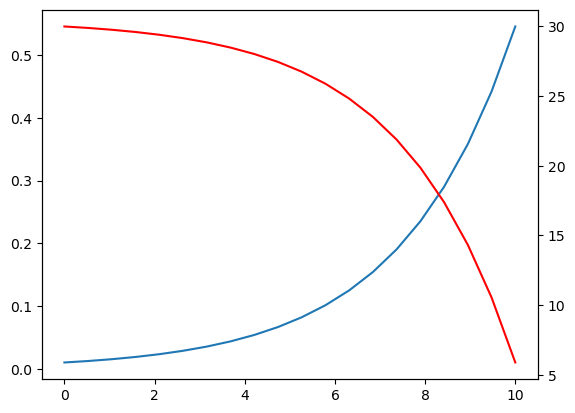

In [39]:
fig,ax = plt.subplots(1)
ax.plot(sol.t, sol.y[0])
ax2 = ax.twinx()
ax2.plot(sol.t, sol.y[1], c = 'r')

In [13]:
sol.y

array([[0.01      , 0.01050188, 0.01713721, 0.05103261, 0.1852487 ,
        0.54598191]])

In [ ]:
"adocbl_c":-0.000223,


In [42]:
model_ez = reframed.load_cbmodel('../../models/e_coli/momentiJO1366.xml')


In [ ]:
model_ez.reactions['R_EX_adocbl_e']

In [51]:
model_ez.reactions['R_BIOMASS_Ec_iJO1366_WT_53p95M']
sol = reframed.FBA(model_ez, constraints={'R_EX_adocbl_e':(-1,0)}, objective='R_BIOMASS_Ec_iJO1366_WT_53p95M')

In [52]:
sol.show_values('R_EX')

R_EX_co2_e    1.23934
R_EX_glc__D_e -0.206557
R_EX_h2o_e    1.23934
R_EX_o2_e    -1.23934
